In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
import plotly.express as px
import nbformat 
import plotly.io as pio

# Apply Analysis Indicators with TA-Lib

# AAPL Historical data

In [2]:
import pandas as pd

# Load the financial data
df = pd.read_csv('AAPL_historical_data.csv')

# Preview the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
print(df.tail)

<bound method NDFrame.tail of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043  

In [4]:
# Ensure the required columns are present
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
if all(column in df.columns for column in required_columns):
    print("All required columns are present.")
else:
    missing = [column for column in required_columns if column not in df.columns]
    print(f"Missing columns: {missing}")

All required columns are present.


In [5]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

             Date       Close      SMA_20      SMA_50
10988  2024-07-17  228.880005  220.862000  204.443600
10989  2024-07-18  224.179993  221.356500  205.293000
10990  2024-07-19  224.309998  222.088000  206.131200
10991  2024-07-22  223.960007  222.911501  206.955600
10992  2024-07-23  225.009995  223.755000  207.764399
10993  2024-07-24  218.539993  224.228500  208.474199
10994  2024-07-25  217.490005  224.440500  209.098399
10995  2024-07-26  217.960007  224.633500  209.709000
10996  2024-07-29  218.240005  225.014500  210.279400
10997  2024-07-30  218.800003  225.117001  210.858600


In [6]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))


             Date       Close     RSI_14
10988  2024-07-17  228.880005  63.587172
10989  2024-07-18  224.179993  56.919750
10990  2024-07-19  224.309998  57.053890
10991  2024-07-22  223.960007  56.543451
10992  2024-07-23  225.009995  57.764268
10993  2024-07-24  218.539993  48.687742
10994  2024-07-25  217.490005  47.386437
10995  2024-07-26  217.960007  48.055700
10996  2024-07-29  218.240005  48.476184
10997  2024-07-30  218.800003  49.359115


In [7]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

             Date       Close      MACD  MACD_signal  MACD_hist
10988  2024-07-17  228.880005  8.463671     8.310411   0.153260
10989  2024-07-18  224.179993  7.612783     8.170885  -0.558103
10990  2024-07-19  224.309998  6.869748     7.910658  -1.040910
10991  2024-07-22  223.960007  6.181391     7.564804  -1.383414
10992  2024-07-23  225.009995  5.655396     7.182923  -1.527527
10993  2024-07-24  218.539993  4.662717     6.678882  -2.016164
10994  2024-07-25  217.490005  3.748082     6.092722  -2.344640
10995  2024-07-26  217.960007  3.026267     5.479431  -2.453164
10996  2024-07-29  218.240005  2.448591     4.873263  -2.424672
10997  2024-07-30  218.800003  2.012764     4.301163  -2.288399


In [8]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

            Date       Close   Returns
10988 2024-07-17  228.880005 -0.025296
10989 2024-07-18  224.179993 -0.020535
10990 2024-07-19  224.309998  0.000580
10991 2024-07-22  223.960007 -0.001560
10992 2024-07-23  225.009995  0.004688
10993 2024-07-24  218.539993 -0.028754
10994 2024-07-25  217.490005 -0.004805
10995 2024-07-26  217.960007  0.002161
10996 2024-07-29  218.240005  0.001285
10997 2024-07-30  218.800003  0.002566


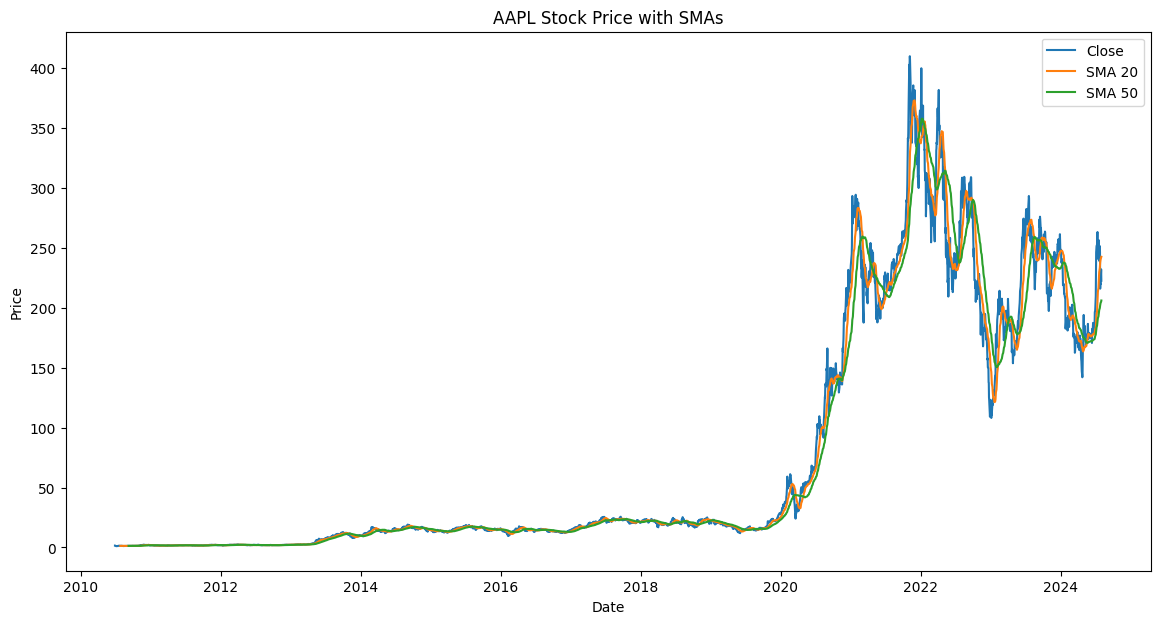

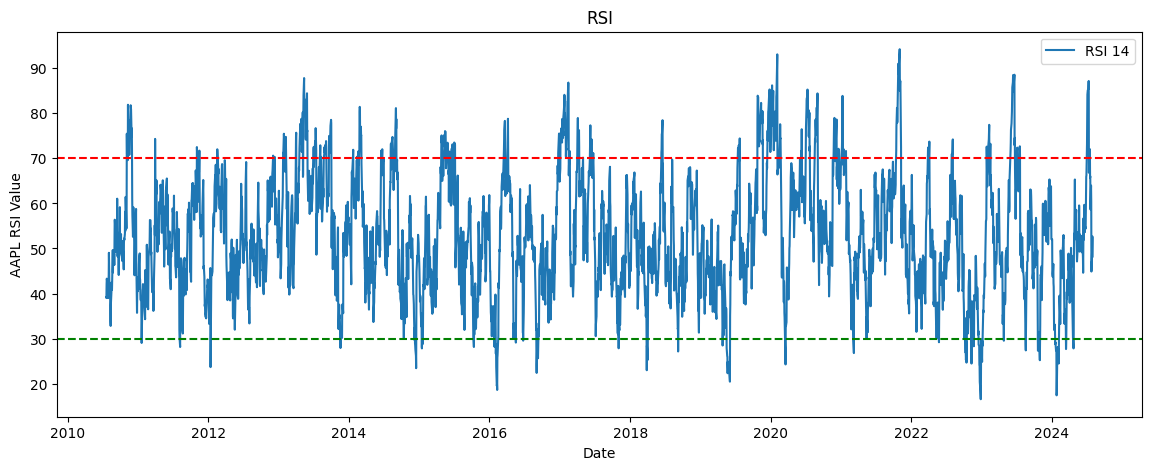

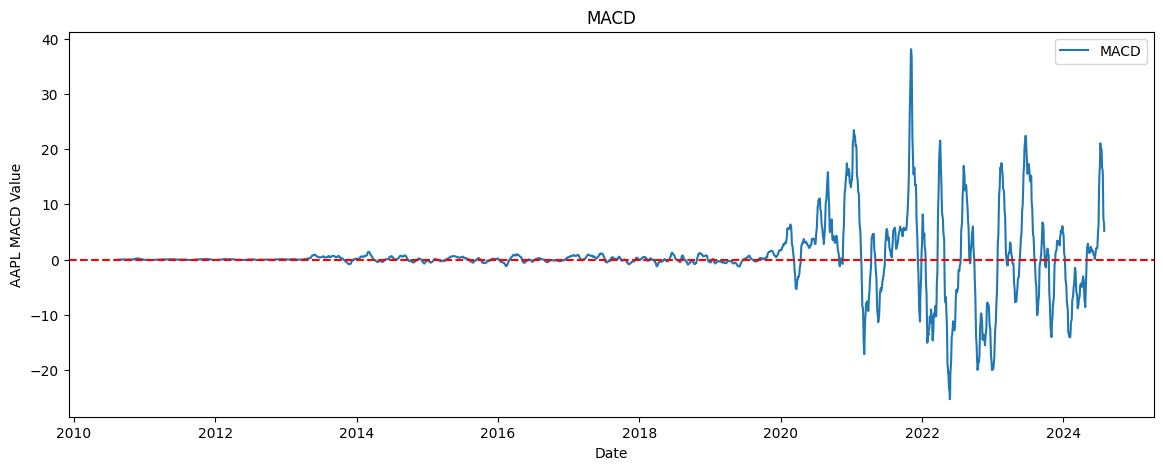

In [283]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('AAPL Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('AAPL RSI Value')
plt.legend()
plt.show()

# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('AAPL MACD Value')
plt.legend()
plt.show()

# AMZN Historical data

In [224]:
import pandas as pd

# Load the financial data
df = pd.read_csv('AMZN_historical_data.csv')

# Preview the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [225]:
print(df.tail)

<bound method NDFrame.tail of             Date        Open        High         Low       Close   Adj Close  \
0     1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1     1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2     1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3     1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4     1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...          ...         ...         ...         ...         ...         ...   
6841  2024-07-24  183.199997  185.449997  180.410004  180.830002  180.830002   
6842  2024-07-25  182.910004  183.899994  176.800003  179.850006  179.850006   
6843  2024-07-26  180.389999  183.190002  180.240005  182.500000  182.500000   
6844  2024-07-29  183.839996  184.750000  182.380005  183.199997  183.199997   
6845  2024-07-30  184.720001  185.860001  179.380005  181.710007  181.710007   

         

In [226]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

            Date       Close    SMA_20      SMA_50
6836  2024-07-17  187.929993  193.5515  187.879400
6837  2024-07-18  183.750000  193.5985  187.780400
6838  2024-07-19  183.130005  193.4500  187.667800
6839  2024-07-22  182.550003  193.1235  187.558800
6840  2024-07-23  186.410004  193.1655  187.497000
6841  2024-07-24  180.830002  192.8900  187.364001
6842  2024-07-25  179.850006  192.2020  187.229601
6843  2024-07-26  182.500000  191.4345  187.138200
6844  2024-07-29  183.199997  190.9320  187.082400
6845  2024-07-30  181.710007  190.1575  187.044000


In [227]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))

            Date       Close     RSI_14
6836  2024-07-17  187.929993  43.449125
6837  2024-07-18  183.750000  38.016792
6838  2024-07-19  183.130005  37.272419
6839  2024-07-22  182.550003  36.551404
6840  2024-07-23  186.410004  44.277037
6841  2024-07-24  180.830002  37.221397
6842  2024-07-25  179.850006  36.132394
6843  2024-07-26  182.500000  41.146719
6844  2024-07-29  183.199997  42.432437
6845  2024-07-30  181.710007  40.408843


In [228]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

            Date       Close      MACD  MACD_signal  MACD_hist
6836  2024-07-17  187.929993  1.892177     3.037522  -1.145345
6837  2024-07-18  183.750000  0.949405     2.619899  -1.670493
6838  2024-07-19  183.130005  0.150489     2.126017  -1.975528
6839  2024-07-22  182.550003 -0.523425     1.596128  -2.119554
6840  2024-07-23  186.410004 -0.737536     1.129395  -1.866931
6841  2024-07-24  180.830002 -1.342010     0.635114  -1.977124
6842  2024-07-25  179.850006 -1.878483     0.132395  -2.010878
6843  2024-07-26  182.500000 -2.065994    -0.307283  -1.758711
6844  2024-07-29  183.199997 -2.133520    -0.672530  -1.460990
6845  2024-07-30  181.710007 -2.280971    -0.994218  -1.286753


In [229]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

           Date       Close   Returns
6836 2024-07-17  187.929993 -0.026370
6837 2024-07-18  183.750000 -0.022242
6838 2024-07-19  183.130005 -0.003374
6839 2024-07-22  182.550003 -0.003167
6840 2024-07-23  186.410004  0.021145
6841 2024-07-24  180.830002 -0.029934
6842 2024-07-25  179.850006 -0.005419
6843 2024-07-26  182.500000  0.014734
6844 2024-07-29  183.199997  0.003836
6845 2024-07-30  181.710007 -0.008133


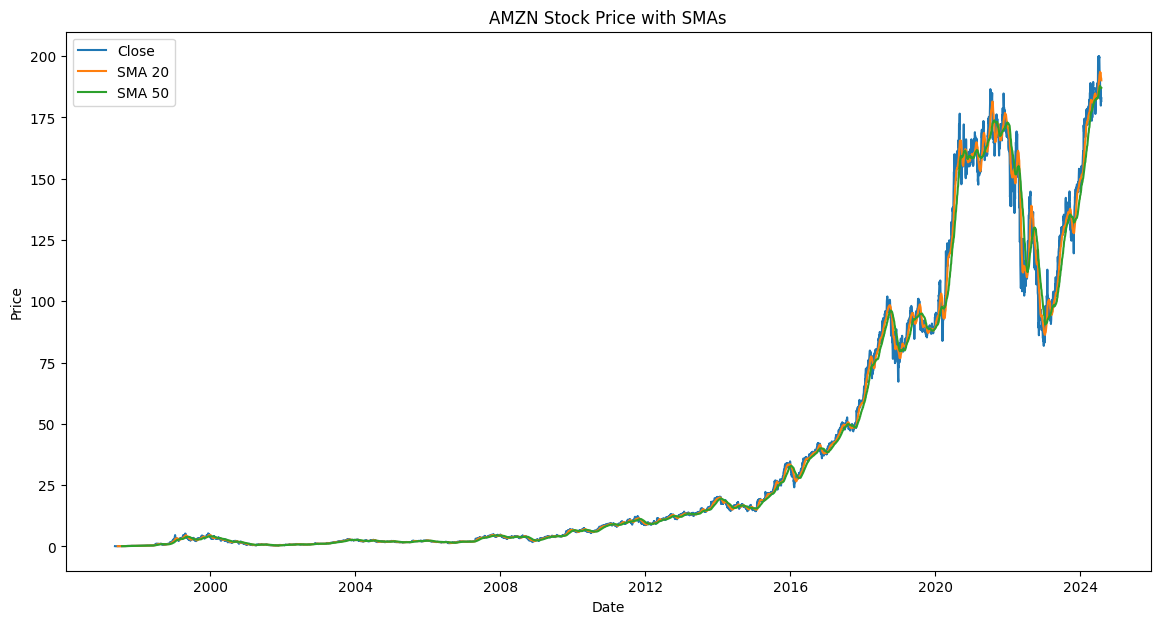

In [230]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('AMZN Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

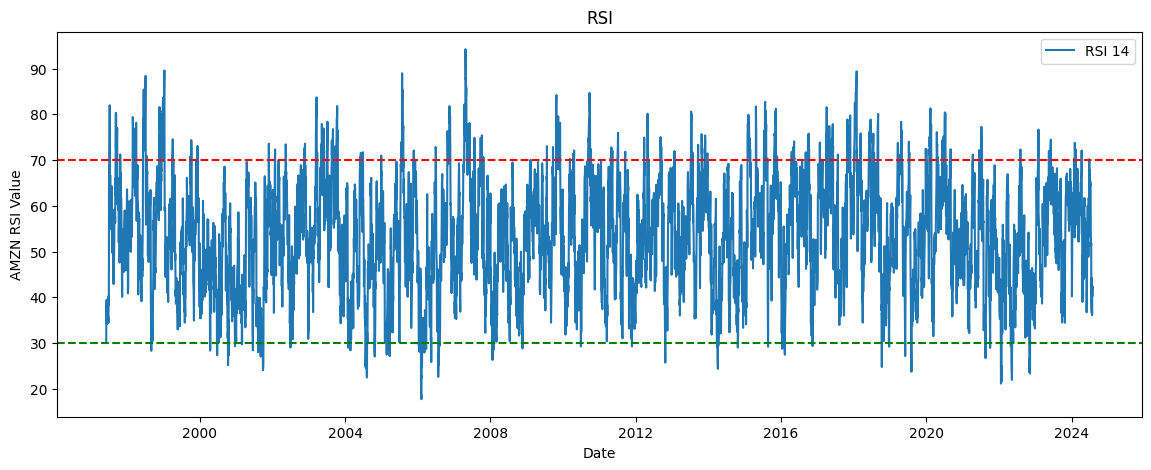

In [231]:
# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('AMZN RSI Value')
plt.legend()
plt.show()

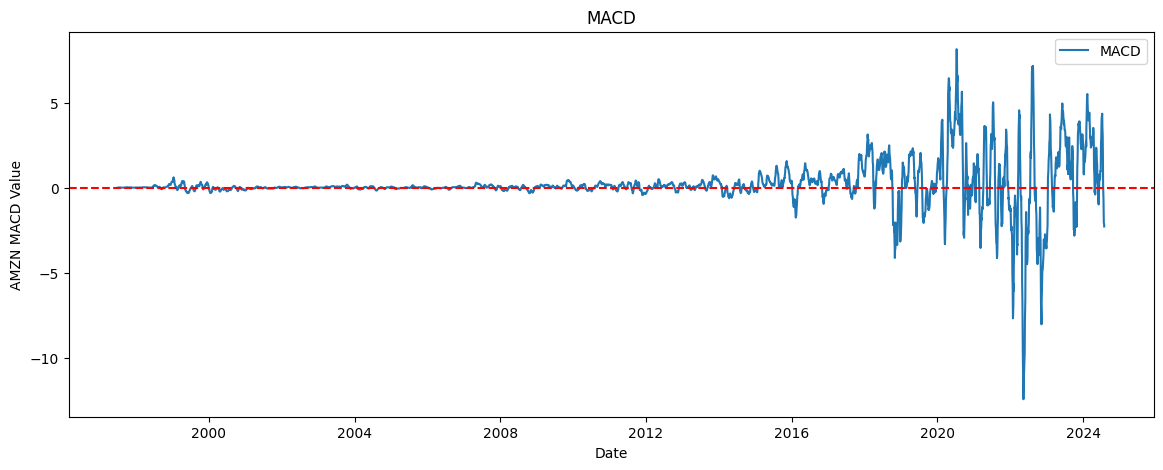

In [232]:
# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('AMZN MACD Value')
plt.legend()
plt.show()

# GOOG Historical data

In [234]:
import pandas as pd

# Load the financial data
df = pd.read_csv('GOOG_historical_data.csv')

# Preview the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [235]:
print(df.tail)

<bound method NDFrame.tail of             Date        Open        High         Low       Close   Adj Close  \
0     2004-08-19    2.490664    2.591785    2.390042    2.499133    2.496292   
1     2004-08-20    2.515820    2.716817    2.503118    2.697639    2.694573   
2     2004-08-23    2.758411    2.826406    2.716070    2.724787    2.721690   
3     2004-08-24    2.770615    2.779581    2.579581    2.611960    2.608991   
4     2004-08-25    2.614201    2.689918    2.587302    2.640104    2.637103   
...          ...         ...         ...         ...         ...         ...   
5015  2024-07-24  175.389999  177.949997  173.570007  174.369995  174.369995   
5016  2024-07-25  174.250000  175.199997  169.050003  169.160004  169.160004   
5017  2024-07-26  168.770004  169.839996  165.865005  168.679993  168.679993   
5018  2024-07-29  170.500000  172.160004  169.720001  171.130005  171.130005   
5019  2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   

         

In [236]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

            Date       Close      SMA_20    SMA_50
5010  2024-07-17  182.619995  185.543000  179.5130
5011  2024-07-18  179.220001  185.681500  179.7008
5012  2024-07-19  179.389999  185.765500  179.8290
5013  2024-07-22  183.350006  185.920000  180.0728
5014  2024-07-23  183.600006  186.060501  180.3132
5015  2024-07-24  174.369995  185.500001  180.3948
5016  2024-07-25  169.160004  184.689501  180.3600
5017  2024-07-26  168.679993  183.780501  180.2950
5018  2024-07-29  171.130005  183.166001  180.2400
5019  2024-07-30  171.860001  182.534501  180.1686


In [237]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))

            Date       Close     RSI_14
5010  2024-07-17  182.619995  47.822735
5011  2024-07-18  179.220001  42.356721
5012  2024-07-19  179.389999  42.709312
5013  2024-07-22  183.350006  50.330895
5014  2024-07-23  183.600006  50.776106
5015  2024-07-24  174.369995  37.434718
5016  2024-07-25  169.160004  32.279082
5017  2024-07-26  168.679993  31.843937
5018  2024-07-29  171.130005  36.545844
5019  2024-07-30  171.860001  37.920068


In [238]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

            Date       Close      MACD  MACD_signal  MACD_hist
5010  2024-07-17  182.619995  2.440458     3.299735  -0.859277
5011  2024-07-18  179.220001  1.685547     2.976897  -1.291350
5012  2024-07-19  179.389999  1.088445     2.599207  -1.510761
5013  2024-07-22  183.350006  0.924125     2.264190  -1.340066
5014  2024-07-23  183.600006  0.804795     1.972311  -1.167516
5015  2024-07-24  174.369995 -0.034166     1.571016  -1.605182
5016  2024-07-25  169.160004 -1.106693     1.035474  -2.142167
5017  2024-07-26  168.679993 -1.972672     0.433845  -2.406517
5018  2024-07-29  171.130005 -2.433223    -0.139569  -2.293654
5019  2024-07-30  171.860001 -2.708091    -0.653273  -2.054818


In [239]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

           Date       Close   Returns
5010 2024-07-17  182.619995 -0.015526
5011 2024-07-18  179.220001 -0.018618
5012 2024-07-19  179.389999  0.000949
5013 2024-07-22  183.350006  0.022075
5014 2024-07-23  183.600006  0.001364
5015 2024-07-24  174.369995 -0.050272
5016 2024-07-25  169.160004 -0.029879
5017 2024-07-26  168.679993 -0.002838
5018 2024-07-29  171.130005  0.014525
5019 2024-07-30  171.860001  0.004266


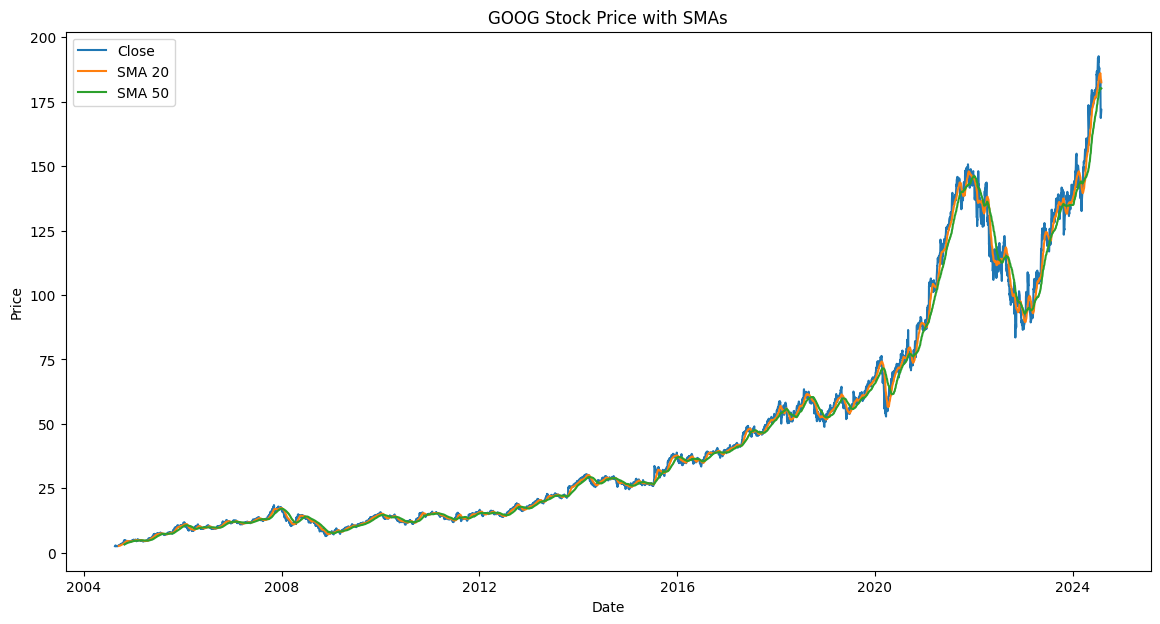

In [240]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('GOOG Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

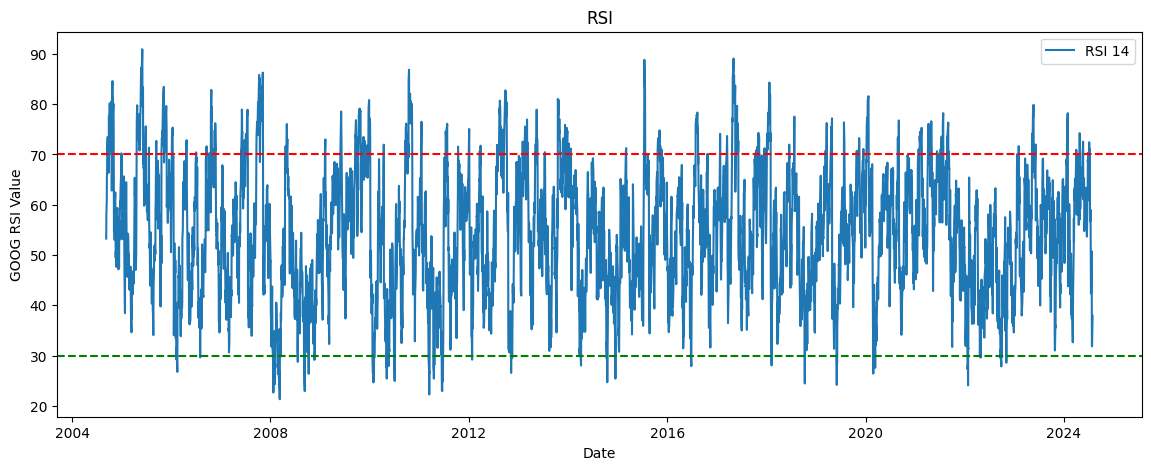

In [241]:
# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('GOOG RSI Value')
plt.legend()
plt.show()

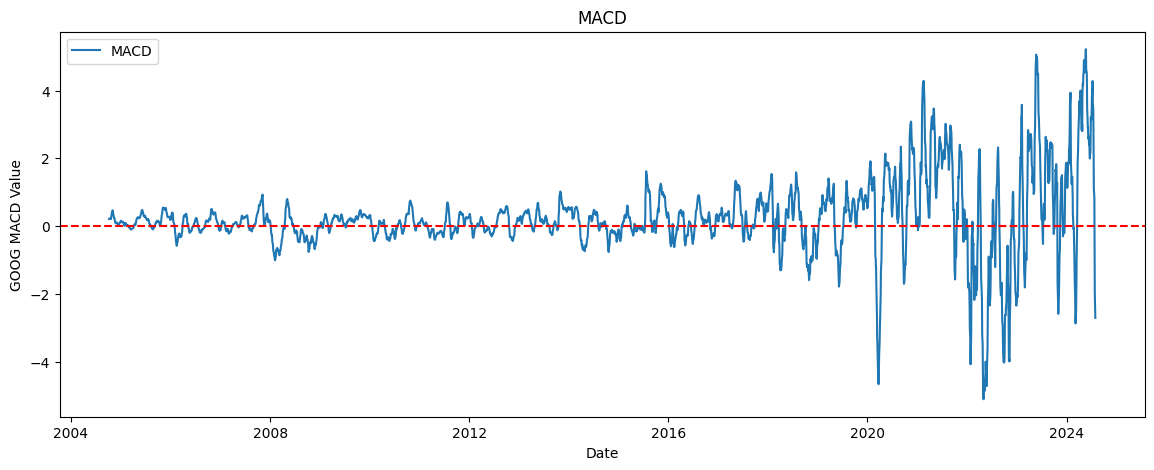

In [242]:
# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('GOOG MACD Value')
plt.legend()
plt.show()

# META Historical data

In [244]:
import pandas as pd

# Load the financial data
df = pd.read_csv('META_historical_data.csv')

# Preview the data
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


In [245]:
print(df.tail)

<bound method NDFrame.tail of             Date        Open        High         Low       Close   Adj Close  \
0     2012-12-12   28.000000   28.139999   27.370001   27.580000   27.523441   
1     2012-12-13   27.590000   28.750000   27.430000   28.240000   28.182087   
2     2012-12-14   28.180000   28.330000   26.760000   26.809999   26.755020   
3     2012-12-17   26.770000   27.000000   26.320000   26.750000   26.695143   
4     2012-12-18   26.959999   27.910000   26.900000   27.709999   27.653173   
...          ...         ...         ...         ...         ...         ...   
2921  2024-07-24  472.309998  476.299988  460.579987  461.269989  461.269989   
2922  2024-07-25  463.260010  463.549988  442.649994  453.410004  453.410004   
2923  2024-07-26  464.200012  469.769989  459.420013  465.700012  465.700012   
2924  2024-07-29  469.880005  473.959991  465.019989  465.709991  465.709991   
2925  2024-07-30  467.000000  472.730011  456.700012  463.190002  463.190002   

        V

In [246]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

            Date       Close      SMA_20      SMA_50
2916  2024-07-17  461.989990  507.997499  491.762000
2917  2024-07-18  475.850006  506.815500  491.965400
2918  2024-07-19  476.790009  505.570000  492.136401
2919  2024-07-22  487.399994  505.200999  492.432401
2920  2024-07-23  488.690002  504.689999  492.697800
2921  2024-07-24  461.269989  502.223499  492.399200
2922  2024-07-25  453.410004  499.237999  492.107200
2923  2024-07-26  465.700012  496.545000  491.984200
2924  2024-07-29  465.709991  494.619499  491.667599
2925  2024-07-30  463.190002  492.545000  491.466799


In [247]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))

            Date       Close     RSI_14
2916  2024-07-17  461.989990  33.162045
2917  2024-07-18  475.850006  40.149101
2918  2024-07-19  476.790009  40.602613
2919  2024-07-22  487.399994  45.612070
2920  2024-07-23  488.690002  46.206114
2921  2024-07-24  461.269989  36.964279
2922  2024-07-25  453.410004  34.814669
2923  2024-07-26  465.700012  40.628601
2924  2024-07-29  465.709991  40.633231
2925  2024-07-30  463.190002  39.789373


In [248]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

            Date       Close       MACD  MACD_signal  MACD_hist
2916  2024-07-17  461.989990  -0.564603     5.841951  -6.406554
2917  2024-07-18  475.850006  -2.579975     4.157566  -6.737541
2918  2024-07-19  476.790009  -4.054583     2.515136  -6.569719
2919  2024-07-22  487.399994  -4.317315     1.148646  -5.465961
2920  2024-07-23  488.690002  -4.371053     0.044706  -4.415759
2921  2024-07-24  461.269989  -6.550694    -1.274374  -5.276320
2922  2024-07-25  453.410004  -8.810746    -2.781648  -6.029098
2923  2024-07-26  465.700012  -9.500635    -4.125446  -5.375189
2924  2024-07-29  465.709991  -9.932081    -5.286773  -4.645308
2925  2024-07-30  463.190002 -10.357947    -6.301008  -4.056939


In [249]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

           Date       Close   Returns
2916 2024-07-17  461.989990 -0.056759
2917 2024-07-18  475.850006  0.030001
2918 2024-07-19  476.790009  0.001975
2919 2024-07-22  487.399994  0.022253
2920 2024-07-23  488.690002  0.002647
2921 2024-07-24  461.269989 -0.056109
2922 2024-07-25  453.410004 -0.017040
2923 2024-07-26  465.700012  0.027106
2924 2024-07-29  465.709991  0.000021
2925 2024-07-30  463.190002 -0.005411


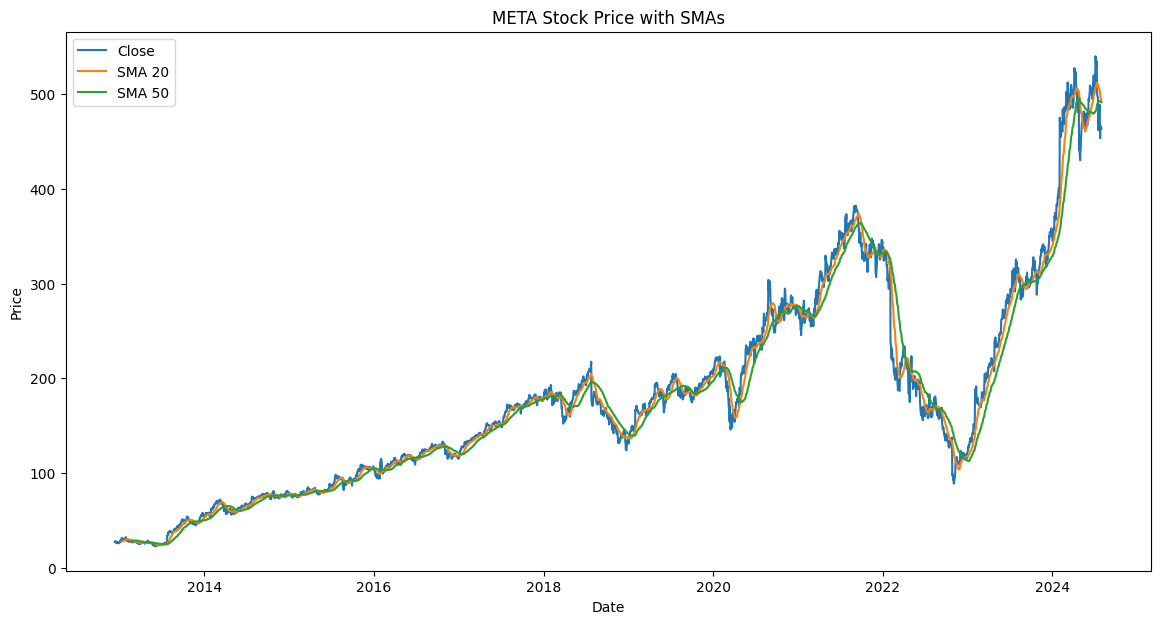

In [250]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('META Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

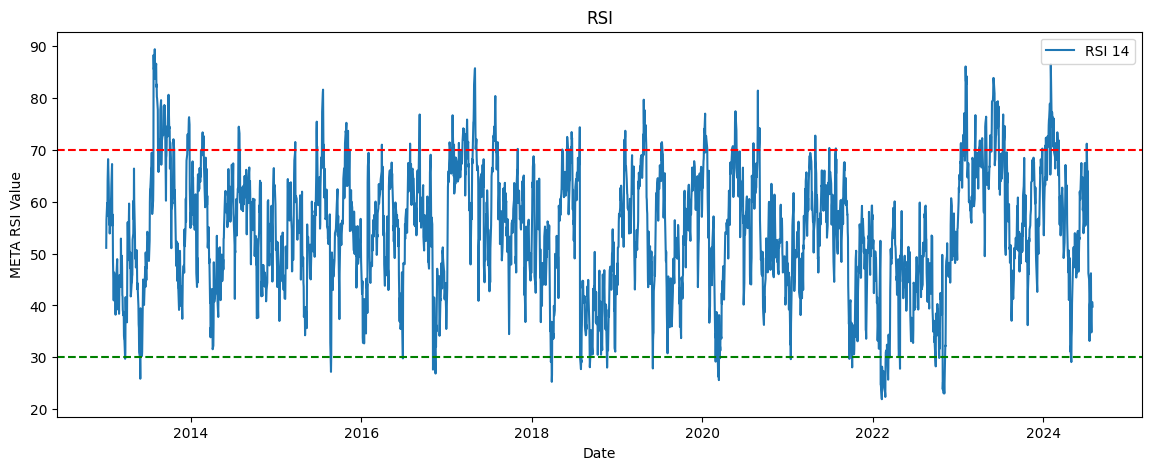

In [251]:
# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('META RSI Value')
plt.legend()
plt.show()

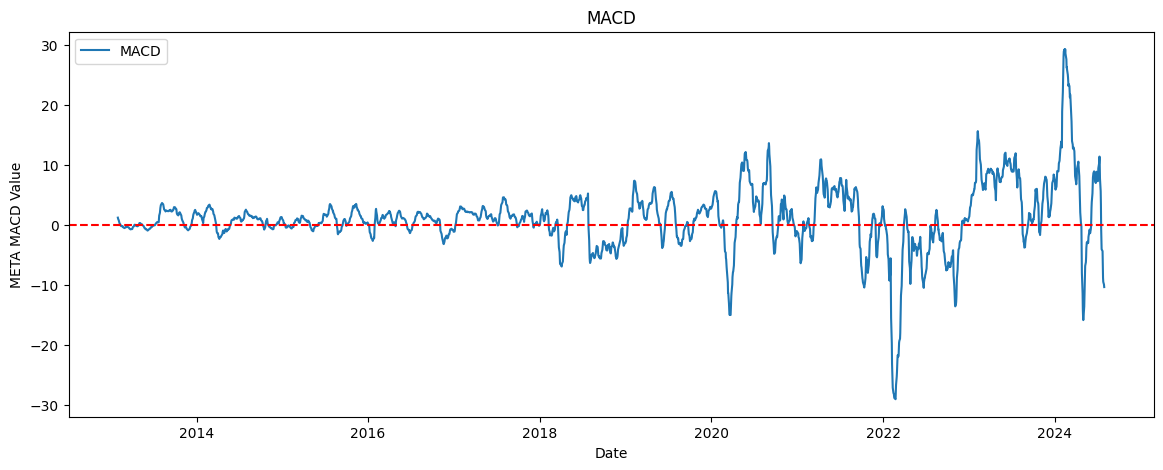

In [252]:
# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('META MACD Value')
plt.legend()
plt.show()

# MSFT Historical data

In [254]:
import pandas as pd

# Load the financial data
df = pd.read_csv('MSFT_historical_data.csv')

# Preview the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [255]:
print(df.tail)

<bound method NDFrame.tail of             Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.059946   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062087   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063158   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061552   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060482   
...          ...         ...         ...         ...         ...         ...   
9667  2024-07-24  440.450012  441.480011  427.589996  428.899994  428.128326   
9668  2024-07-25  428.799988  429.799988  417.510010  418.399994  417.647217   
9669  2024-07-26  418.200012  428.920013  417.269989  425.269989  424.504852   
9670  2024-07-29  431.579987  432.149994  424.700012  426.730011  425.962250   
9671  2024-07-30  427.720001  429.049988  417.359985  422.920013  422.159119   

         

In [256]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

            Date       Close      SMA_20      SMA_50
9662  2024-07-17  443.519989  454.201001  436.130200
9663  2024-07-18  440.369995  453.902501  436.666800
9664  2024-07-19  437.109985  453.473000  437.222200
9665  2024-07-22  442.940002  453.131000  437.870200
9666  2024-07-23  444.850006  452.989999  438.520800
9667  2024-07-24  428.899994  451.887498  438.804000
9668  2024-07-25  418.399994  450.199498  438.897599
9669  2024-07-26  425.269989  448.820497  439.071799
9670  2024-07-29  426.730011  447.809497  439.144800
9671  2024-07-30  422.920013  446.118997  439.183400


In [257]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))

            Date       Close     RSI_14
9662  2024-07-17  443.519989  45.565538
9663  2024-07-18  440.369995  43.052471
9664  2024-07-19  437.109985  40.559301
9665  2024-07-22  442.940002  46.523504
9666  2024-07-23  444.850006  48.351906
9667  2024-07-24  428.899994  36.980921
9668  2024-07-25  418.399994  31.696381
9669  2024-07-26  425.269989  37.944660
9670  2024-07-29  426.730011  39.217239
9671  2024-07-30  422.920013  37.080269


In [258]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

            Date       Close      MACD  MACD_signal  MACD_hist
9662  2024-07-17  443.519989  4.632632     7.301769  -2.669137
9663  2024-07-18  440.369995  3.253147     6.492045  -3.238898
9664  2024-07-19  437.109985  1.875223     5.568681  -3.693457
9665  2024-07-22  442.940002  1.239356     4.702816  -3.463460
9666  2024-07-23  444.850006  0.879410     3.938134  -3.058724
9667  2024-07-24  428.899994 -0.684986     3.013510  -3.698496
9668  2024-07-25  418.399994 -2.740453     1.862718  -4.603171
9669  2024-07-26  425.269989 -3.771598     0.735855  -4.507452
9670  2024-07-29  426.730011 -4.420024    -0.295321  -4.124703
9671  2024-07-30  422.920013 -5.181612    -1.272579  -3.909033


In [259]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

           Date       Close   Returns
9662 2024-07-17  443.519989 -0.013348
9663 2024-07-18  440.369995 -0.007102
9664 2024-07-19  437.109985 -0.007403
9665 2024-07-22  442.940002  0.013338
9666 2024-07-23  444.850006  0.004312
9667 2024-07-24  428.899994 -0.035855
9668 2024-07-25  418.399994 -0.024481
9669 2024-07-26  425.269989  0.016420
9670 2024-07-29  426.730011  0.003433
9671 2024-07-30  422.920013 -0.008928


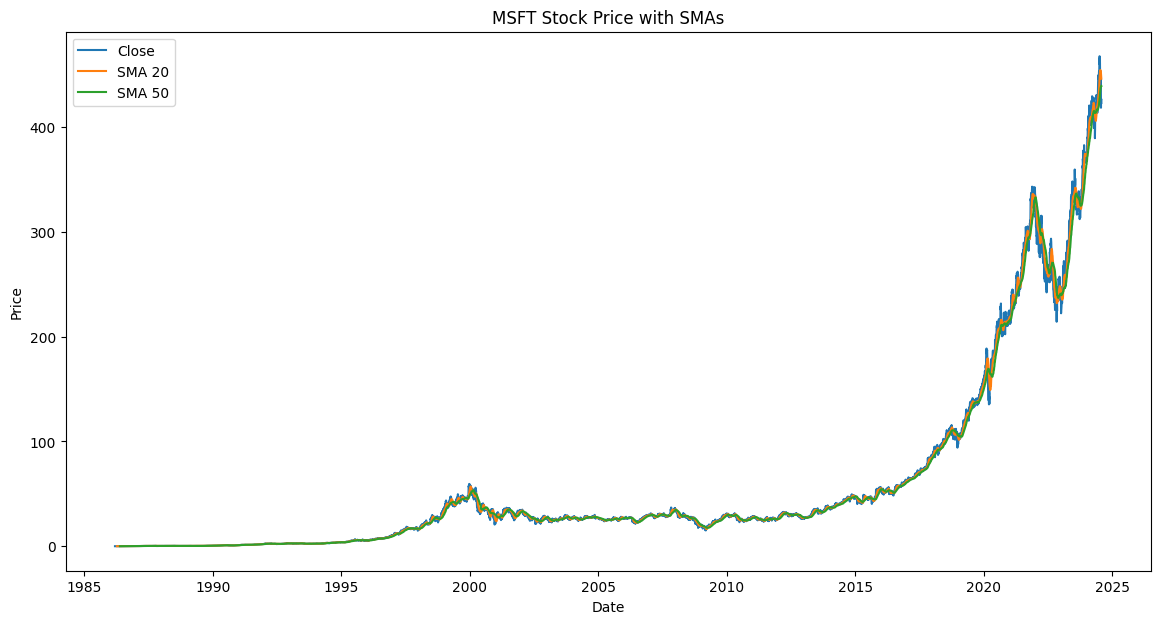

In [260]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('MSFT Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

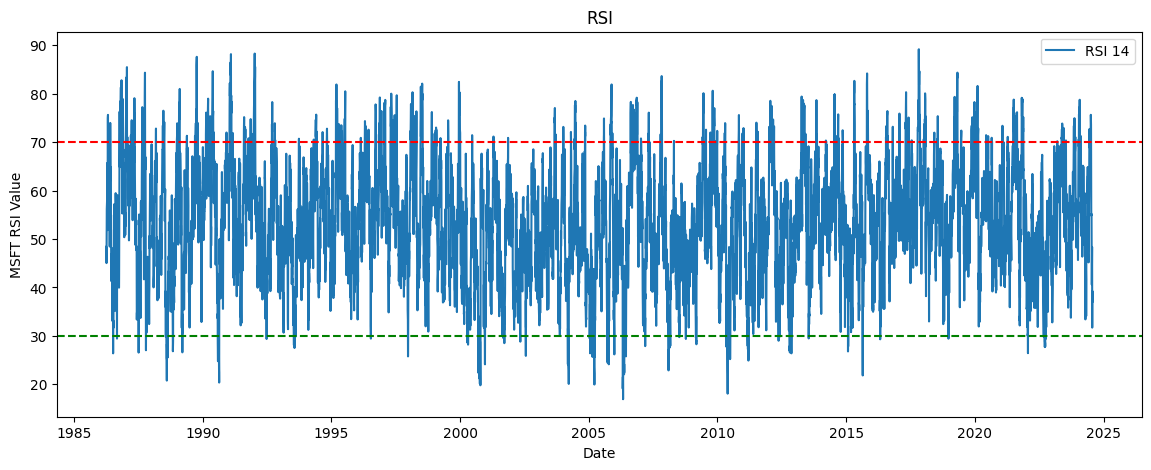

In [261]:
# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('MSFT RSI Value')
plt.legend()
plt.show()

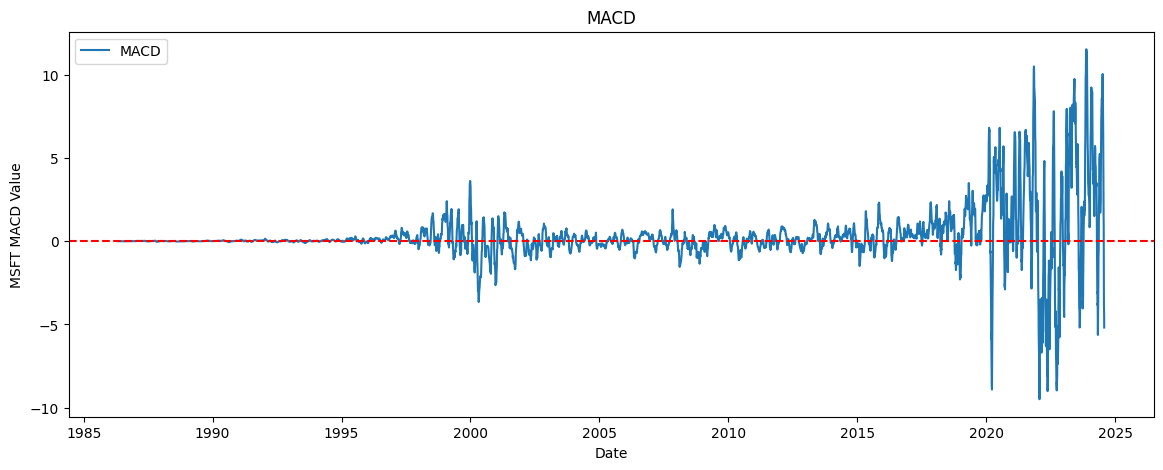

In [262]:
# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MSFT MACD Value')
plt.legend()
plt.show()

# NVDA Historical data

In [264]:
import pandas as pd

# Load the financial data
df = pd.read_csv('NVDA_historical_data.csv')

# Preview the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [265]:
print(df.tail)

<bound method NDFrame.tail of             Date        Open        High         Low       Close   Adj Close  \
0     1999-01-22    0.043750    0.048828    0.038802    0.041016    0.037621   
1     1999-01-25    0.044271    0.045833    0.041016    0.045313    0.041562   
2     1999-01-26    0.045833    0.046745    0.041146    0.041797    0.038337   
3     1999-01-27    0.041927    0.042969    0.039583    0.041667    0.038218   
4     1999-01-28    0.041667    0.041927    0.041276    0.041536    0.038098   
...          ...         ...         ...         ...         ...         ...   
6416  2024-07-24  119.169998  119.949997  113.440002  114.250000  114.250000   
6417  2024-07-25  113.040001  116.629997  106.300003  112.279999  112.279999   
6418  2024-07-26  116.190002  116.199997  111.580002  113.059998  113.059998   
6419  2024-07-29  113.690002  116.279999  111.300003  111.589996  111.589996   
6420  2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   

         

In [266]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

            Date       Close      SMA_20     SMA_50
6411  2024-07-17  117.989998  126.803001  115.02780
6412  2024-07-18  121.089996  126.078500  115.60680
6413  2024-07-19  117.930000  125.436000  116.15432
6414  2024-07-22  123.540001  125.284501  116.81688
6415  2024-07-23  122.589996  125.508500  117.49374
6416  2024-07-24  114.250000  124.916500  117.98118
6417  2024-07-25  112.279999  124.210500  118.41880
6418  2024-07-26  113.059998  123.664000  118.85288
6419  2024-07-29  111.589996  123.066500  119.19208
6420  2024-07-30  103.730003  122.038000  119.37950


In [267]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))

            Date       Close     RSI_14
6411  2024-07-17  117.989998  43.786836
6412  2024-07-18  121.089996  47.499207
6413  2024-07-19  117.930000  44.288408
6414  2024-07-22  123.540001  50.664406
6415  2024-07-23  122.589996  49.628591
6416  2024-07-24  114.250000  41.589800
6417  2024-07-25  112.279999  39.943932
6418  2024-07-26  113.059998  40.940507
6419  2024-07-29  111.589996  39.606589
6420  2024-07-30  103.730003  33.349720


In [268]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

            Date       Close      MACD  MACD_signal  MACD_hist
6411  2024-07-17  117.989998  2.515052     4.087603  -1.572551
6412  2024-07-18  121.089996  1.917760     3.653634  -1.735875
6413  2024-07-19  117.930000  1.175861     3.158080  -1.982218
6414  2024-07-22  123.540001  1.028723     2.732208  -1.703485
6415  2024-07-23  122.589996  0.825937     2.350954  -1.525017
6416  2024-07-24  114.250000 -0.007652     1.879233  -1.886885
6417  2024-07-25  112.279999 -0.817813     1.339824  -2.157637
6418  2024-07-26  113.059998 -1.381013     0.795656  -2.176669
6419  2024-07-29  111.589996 -1.923793     0.251767  -2.175559
6420  2024-07-30  103.730003 -2.954132    -0.389413  -2.564719


In [269]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

           Date       Close   Returns
6411 2024-07-17  117.989998 -0.066239
6412 2024-07-18  121.089996  0.026273
6413 2024-07-19  117.930000 -0.026096
6414 2024-07-22  123.540001  0.047571
6415 2024-07-23  122.589996 -0.007690
6416 2024-07-24  114.250000 -0.068032
6417 2024-07-25  112.279999 -0.017243
6418 2024-07-26  113.059998  0.006947
6419 2024-07-29  111.589996 -0.013002
6420 2024-07-30  103.730003 -0.070436


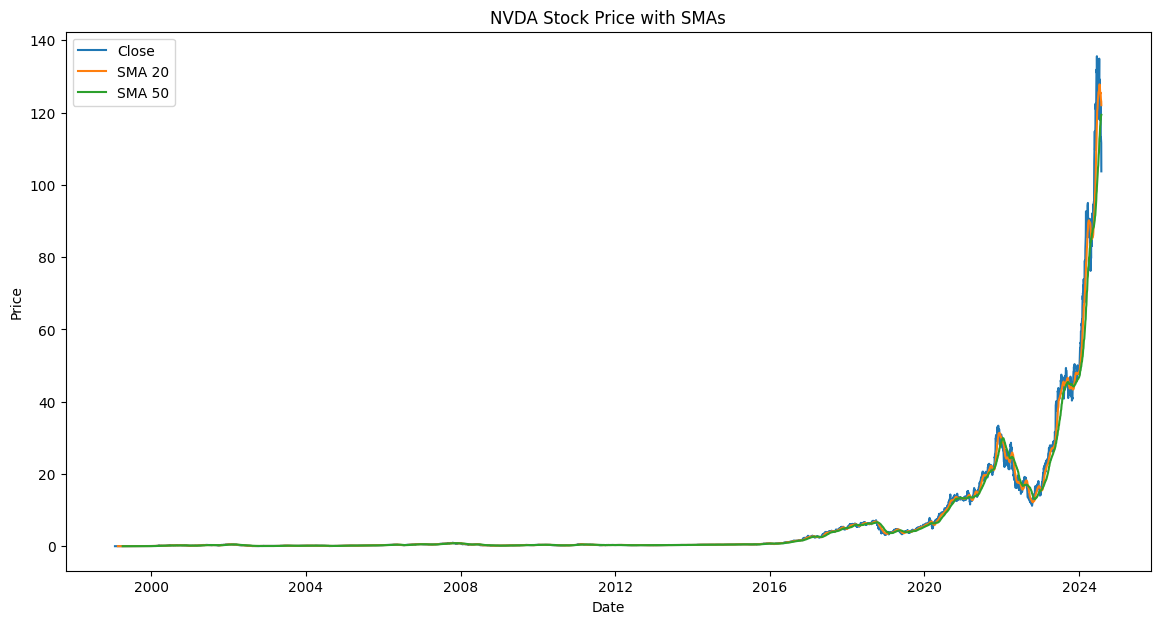

In [270]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('NVDA Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

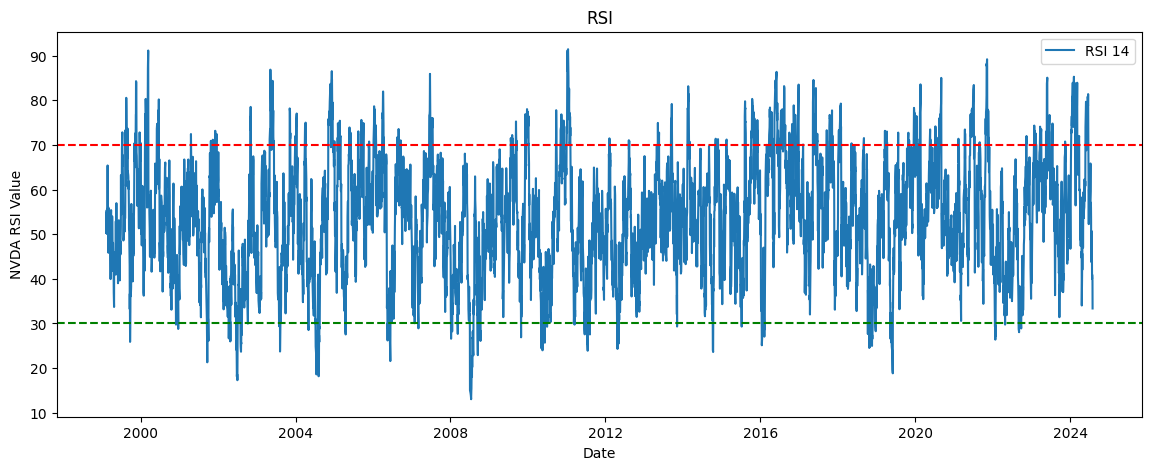

In [271]:
# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('NVDA RSI Value')
plt.legend()
plt.show()

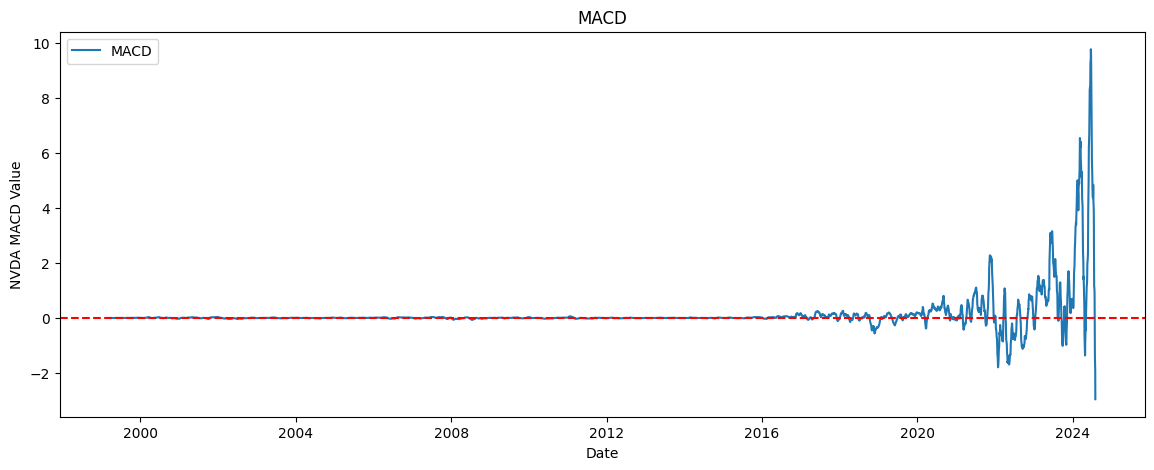

In [272]:
# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('NVDA MACD Value')
plt.legend()
plt.show()

# TSLA Historical data

In [12]:
import pandas as pd
import pynance as pn

# Load the financial data
df = pd.read_csv('TSLA_historical_data.csv')

# Preview the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
print(df.tail)

<bound method NDFrame.tail of             Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
1     2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2     2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
3     2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
4     2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...          ...         ...         ...         ...         ...         ...   
3540  2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
3541  2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
3542  2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
3543  2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
3544  2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995   

         

In [10]:
import talib

# Calculate 20-day and 50-day simple moving averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Preview the result
print(df[['Date', 'Close', 'SMA_20', 'SMA_50']].tail(10))

            Date       Close      SMA_20    SMA_50
3535  2024-07-17  248.500000  223.778000  195.6922
3536  2024-07-18  249.229996  226.996500  196.9816
3537  2024-07-19  239.199997  229.877999  198.2094
3538  2024-07-22  251.509995  233.302999  199.7452
3539  2024-07-23  246.380005  236.492999  201.2334
3540  2024-07-24  215.990005  237.924999  202.1838
3541  2024-07-25  220.250000  239.118999  203.1510
3542  2024-07-26  219.800003  240.238000  203.9960
3543  2024-07-29  232.100006  241.949000  205.1582
3544  2024-07-30  222.619995  242.587000  206.1138


In [277]:
# Calculate 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Preview the result
print(df[['Date', 'Close', 'RSI_14']].tail(10))

            Date       Close     RSI_14
3535  2024-07-17  248.500000  65.715141
3536  2024-07-18  249.229996  66.005487
3537  2024-07-19  239.199997  58.655486
3538  2024-07-22  251.509995  63.959876
3539  2024-07-23  246.380005  60.477660
3540  2024-07-24  215.990005  44.886918
3541  2024-07-25  220.250000  46.951389
3542  2024-07-26  219.800003  46.752165
3543  2024-07-29  232.100006  52.664511
3544  2024-07-30  222.619995  48.220474


In [278]:
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Preview the result
print(df[['Date', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10))

            Date       Close       MACD  MACD_signal  MACD_hist
3535  2024-07-17  248.500000  19.134324    17.754460   1.379865
3536  2024-07-18  249.229996  18.309263    17.865420   0.443843
3537  2024-07-19  239.199997  16.654081    17.623152  -0.969071
3538  2024-07-22  251.509995  16.149490    17.328420  -1.178930
3539  2024-07-23  246.380005  15.160886    16.894913  -1.734027
3540  2024-07-24  215.990005  11.789291    15.873789  -4.084498
3541  2024-07-25  220.250000   9.353206    14.569672  -5.216466
3542  2024-07-26  219.800003   7.302106    13.116159  -5.814053
3543  2024-07-29  232.100006   6.593101    11.811547  -5.218447
3544  2024-07-30  222.619995   5.206237    10.490485  -5.284248


In [279]:
import pynance as pn

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Preview the result
print(df[['Date', 'Close', 'Returns']].tail(10))

           Date       Close   Returns
3535 2024-07-17  248.500000 -0.031416
3536 2024-07-18  249.229996  0.002938
3537 2024-07-19  239.199997 -0.040244
3538 2024-07-22  251.509995  0.051463
3539 2024-07-23  246.380005 -0.020397
3540 2024-07-24  215.990005 -0.123346
3541 2024-07-25  220.250000  0.019723
3542 2024-07-26  219.800003 -0.002043
3543 2024-07-29  232.100006  0.055960
3544 2024-07-30  222.619995 -0.040845


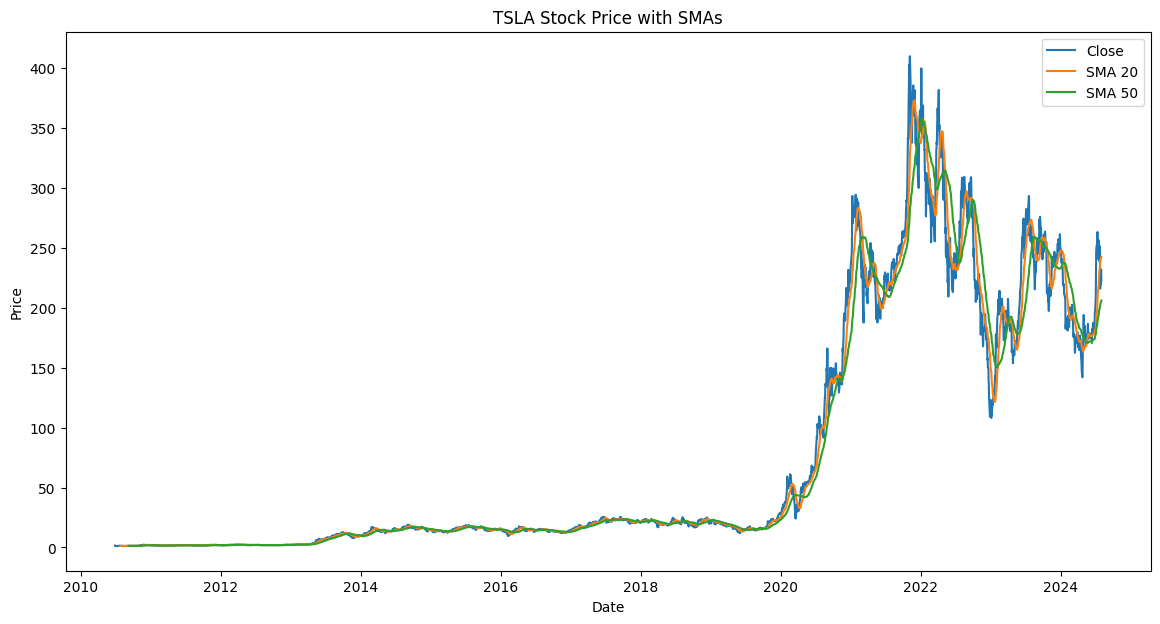

In [280]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title('TSLA Stock Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

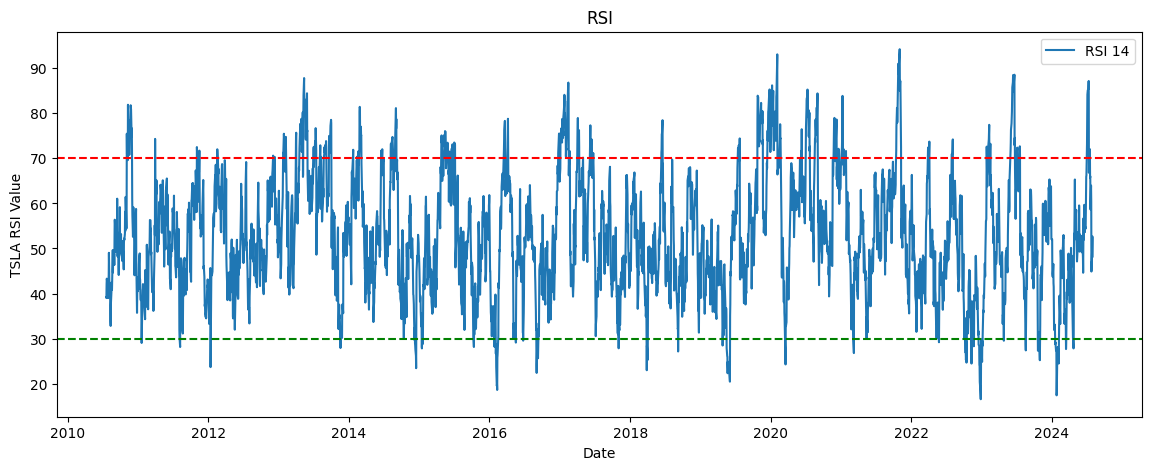

In [281]:
# Plot the RSI
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('TSLA RSI Value')
plt.legend()
plt.show()

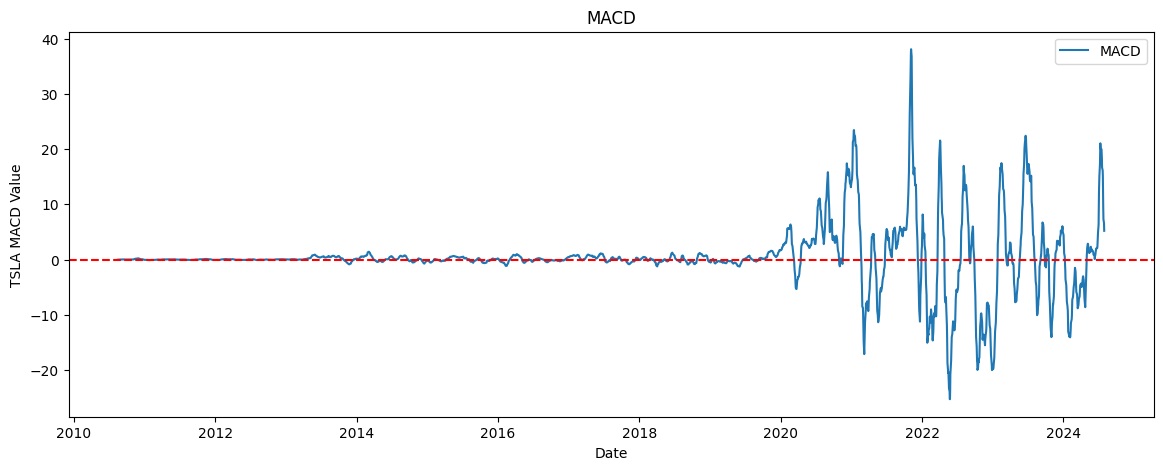

In [282]:
# Plot the MACD
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.axhline(0, color='red', linestyle='--')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('TSLA MACD Value')
plt.legend()
plt.show()

# Using pynance for the financial metrics analysis

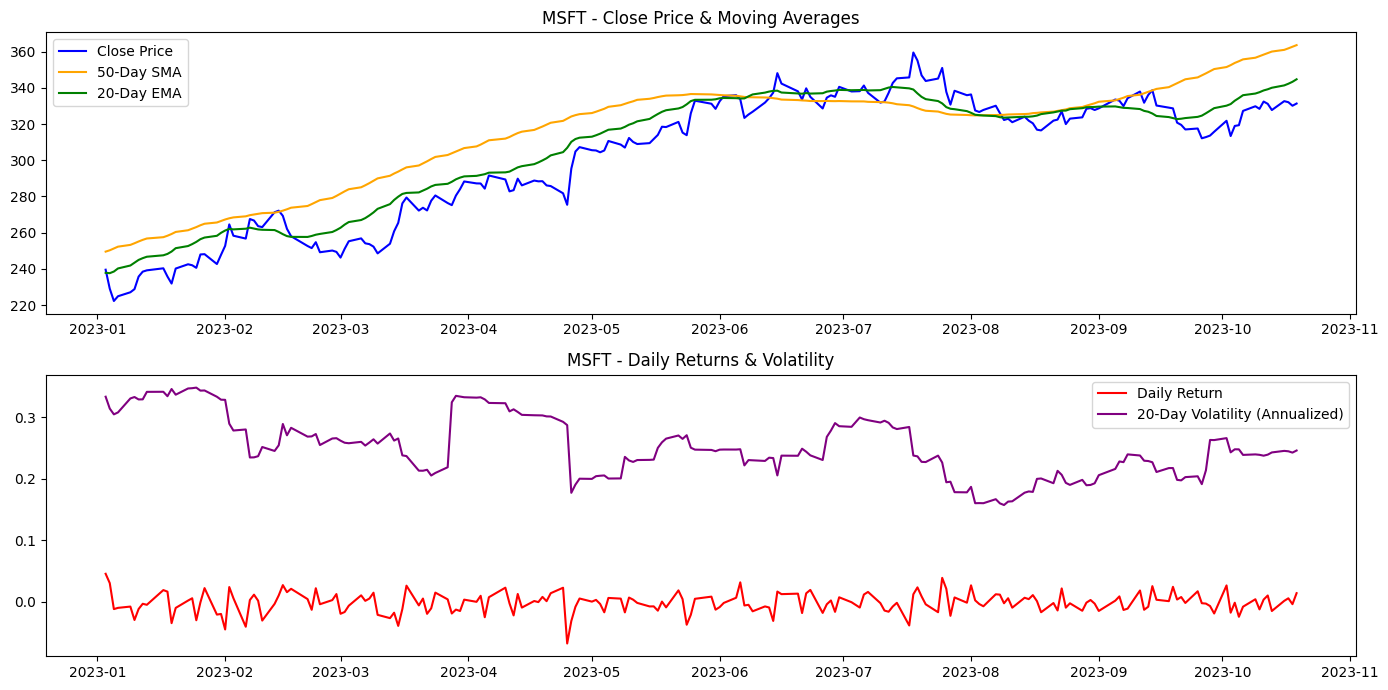

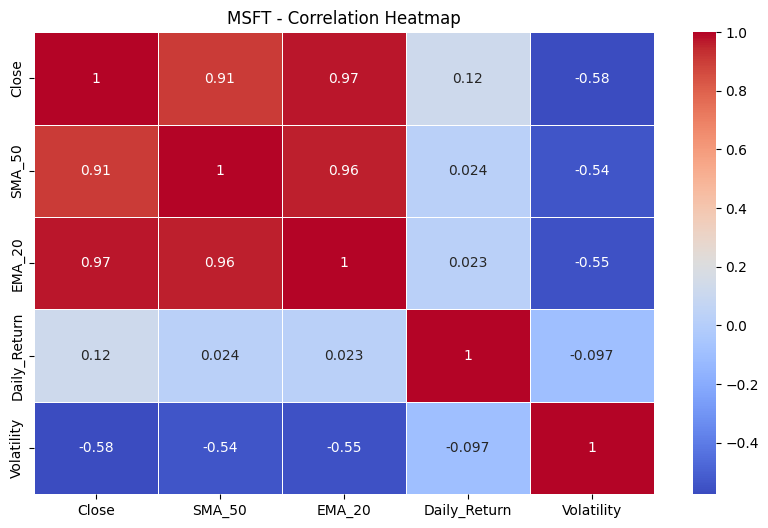

In [2]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'MSFT'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()


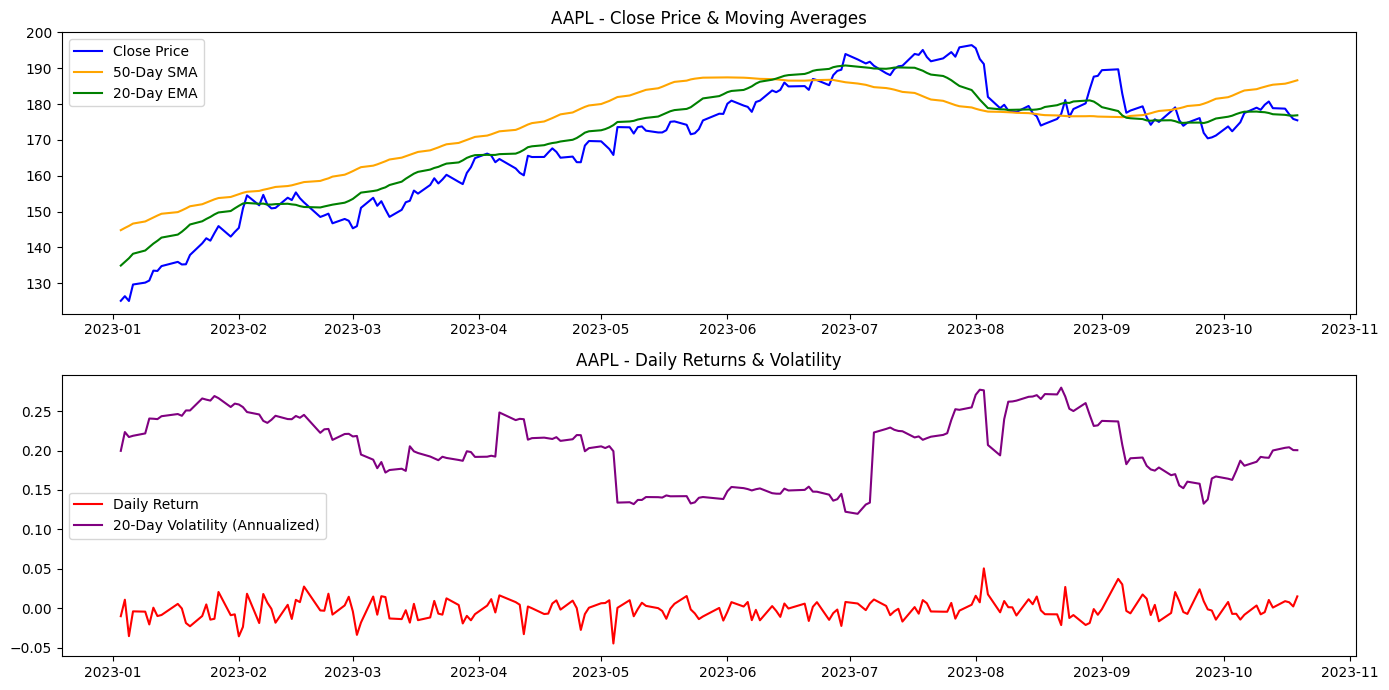

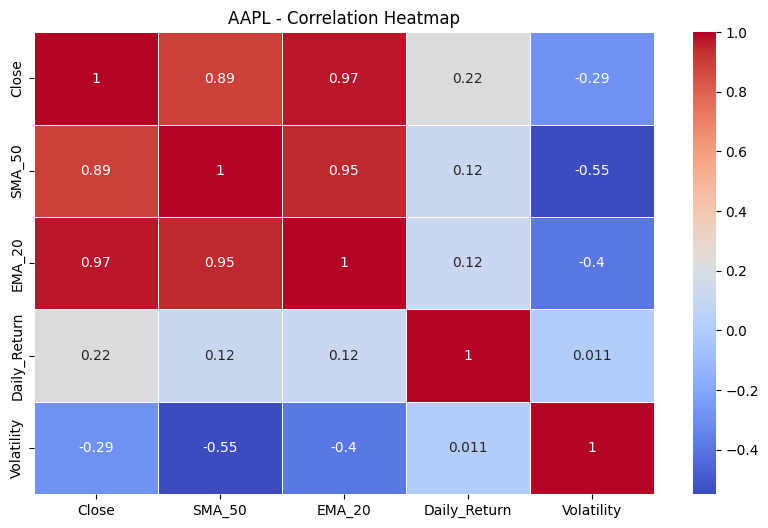

In [3]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'AAPL'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()

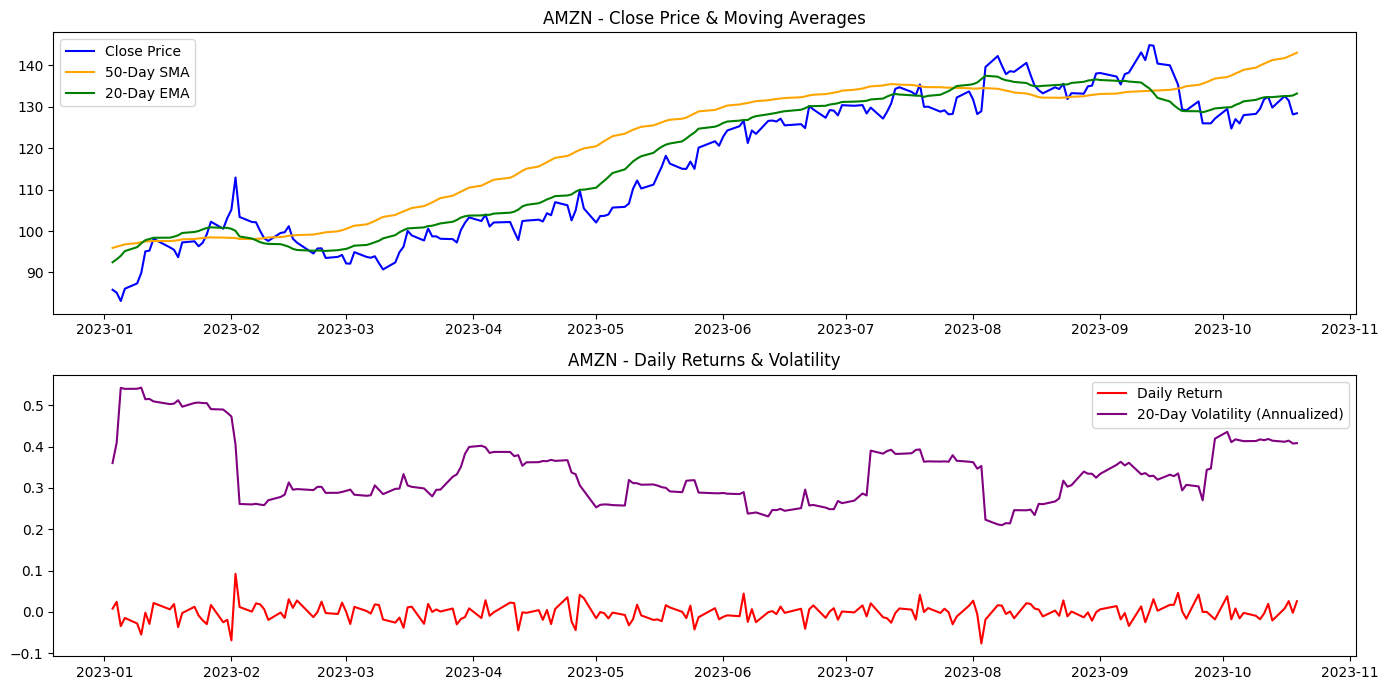

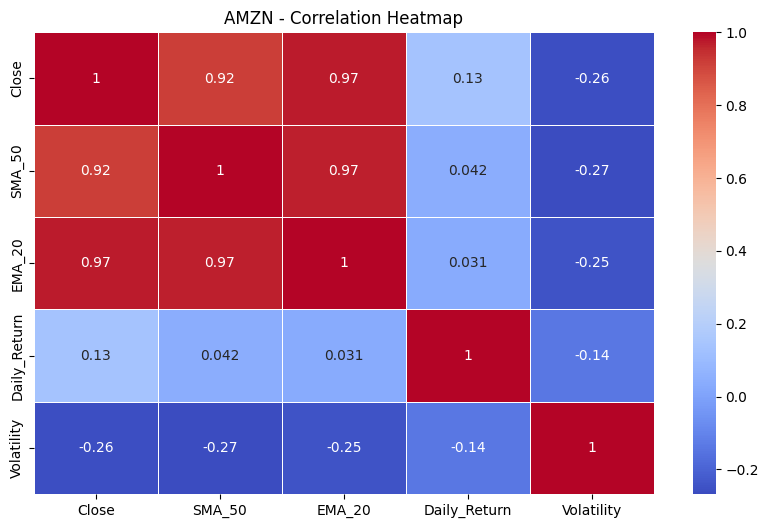

In [4]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'AMZN'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()

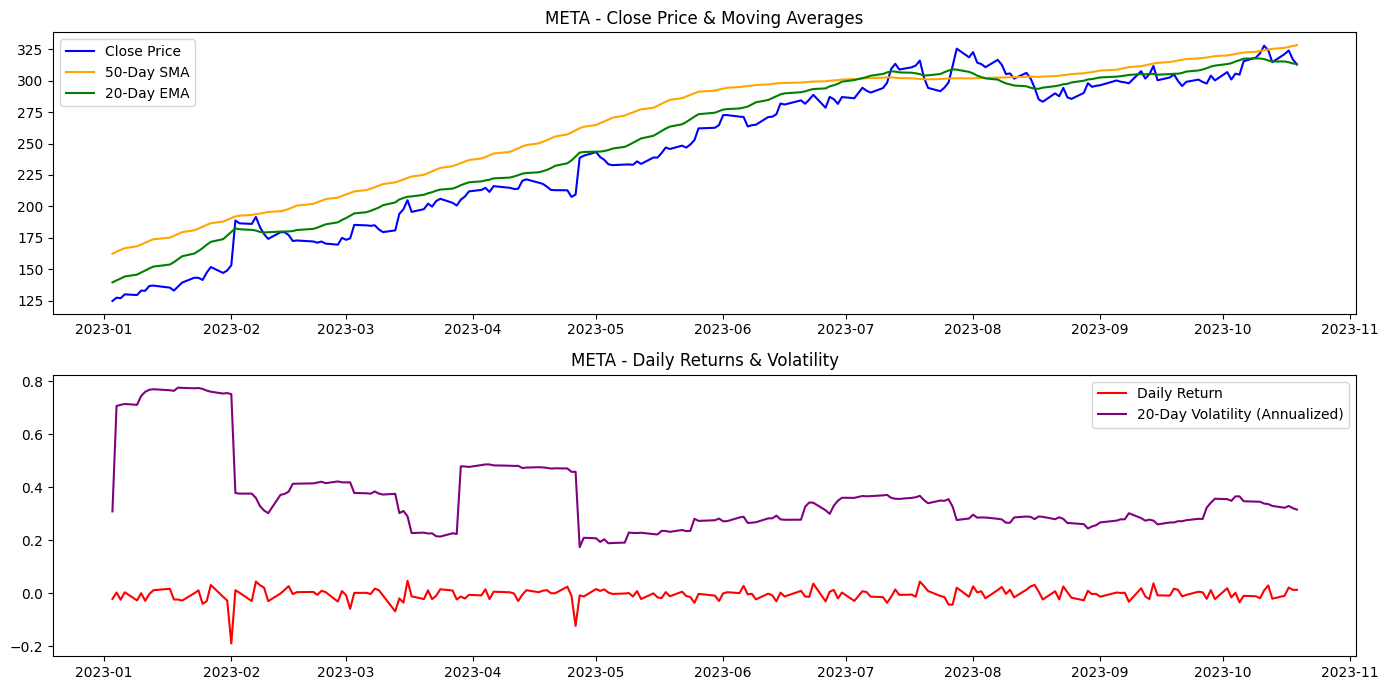

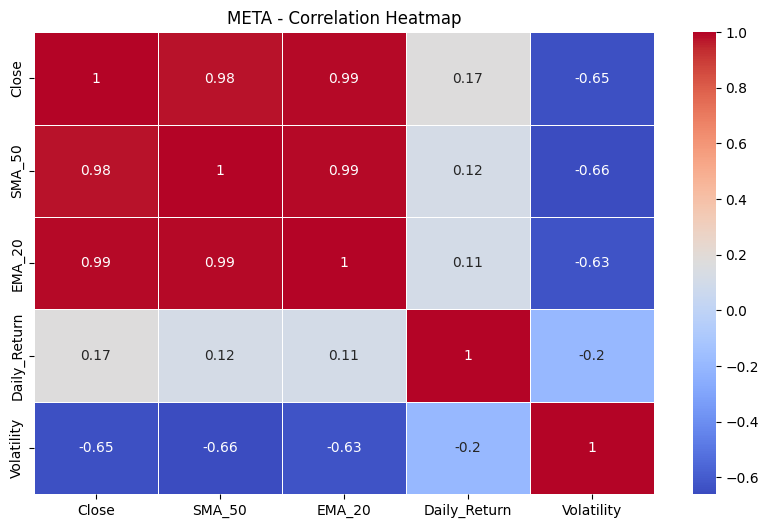

In [5]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'META'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()

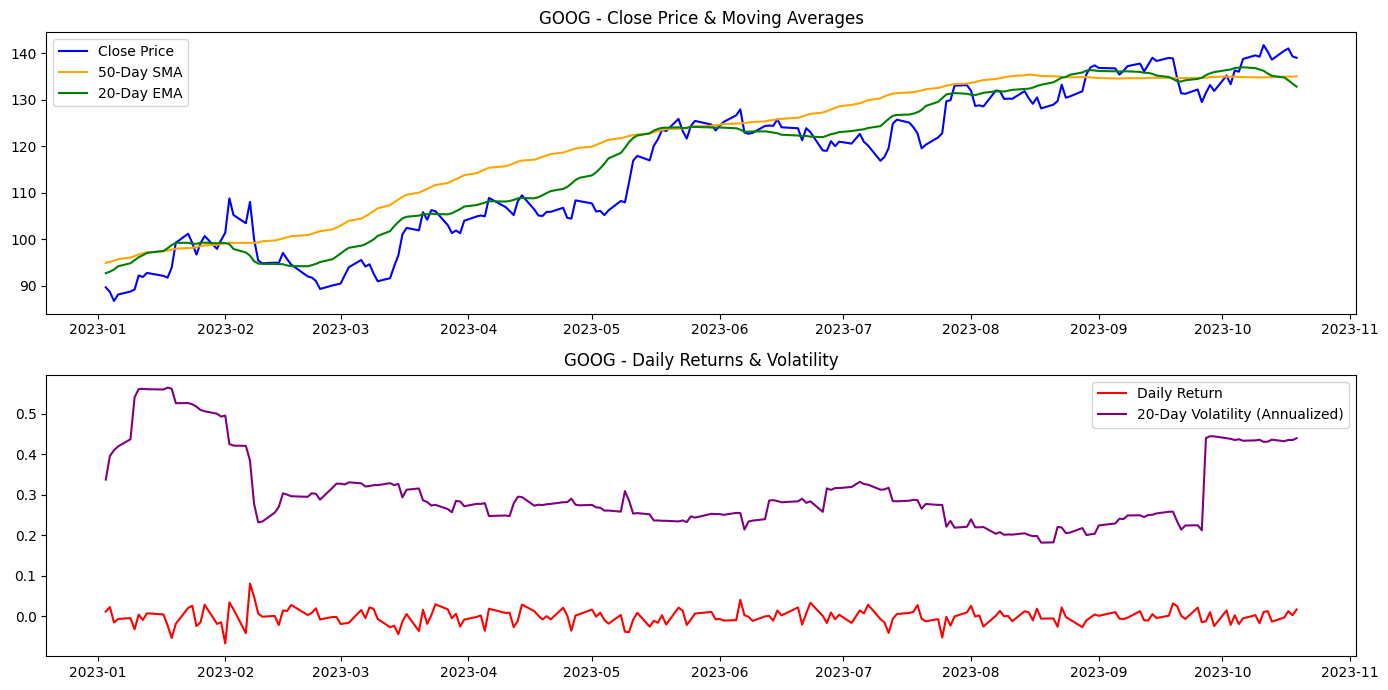

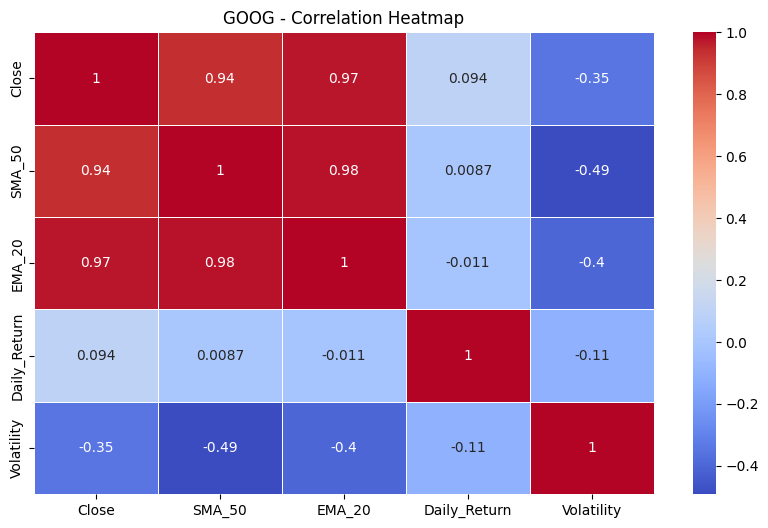

In [6]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'GOOG'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()

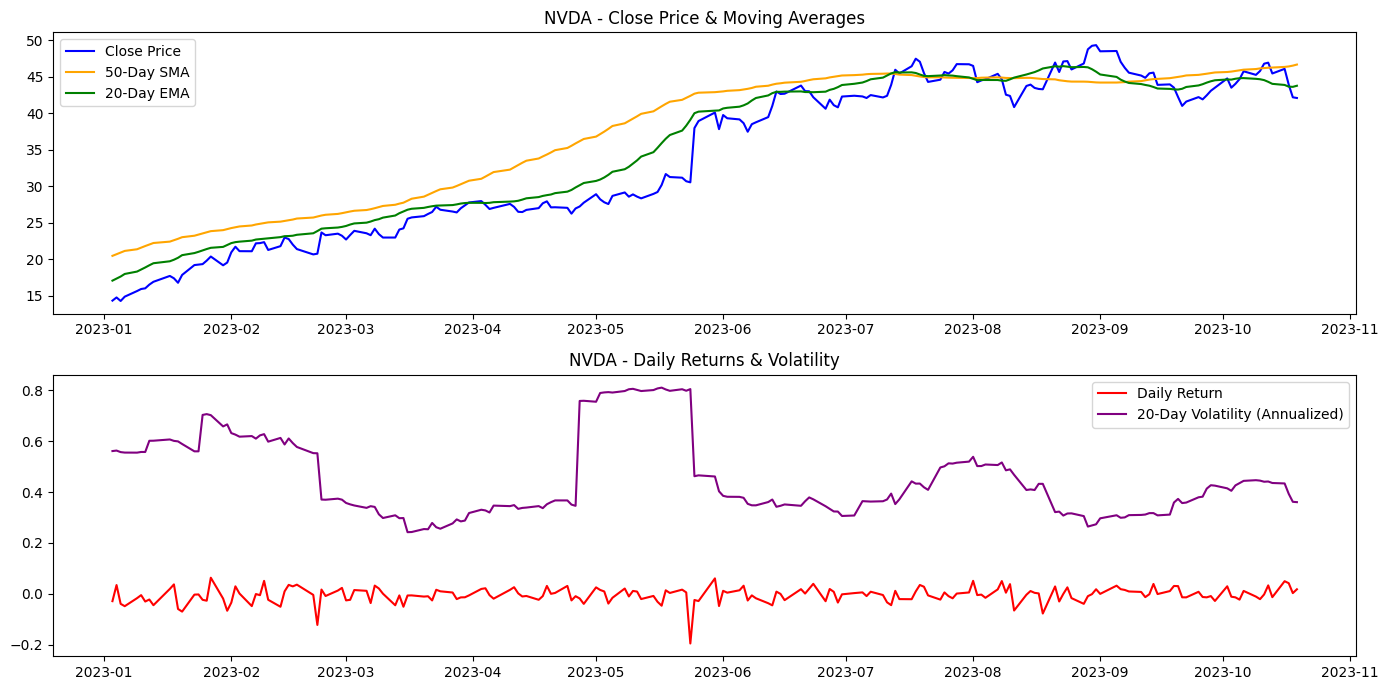

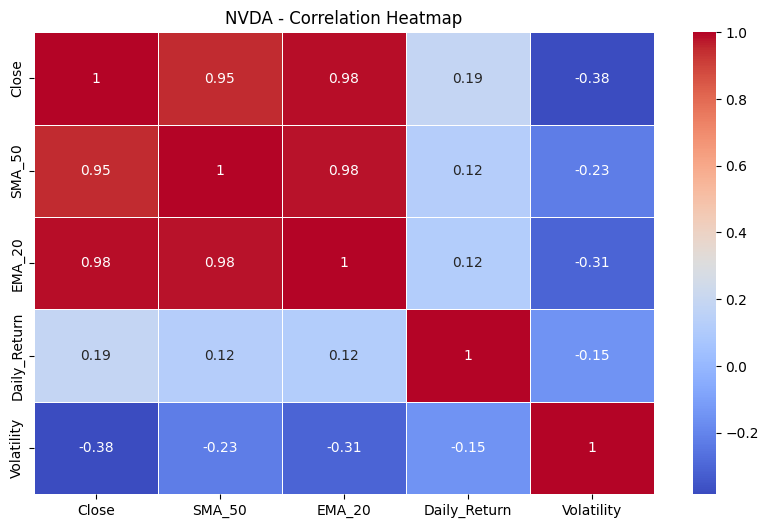

In [7]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'NVDA'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()

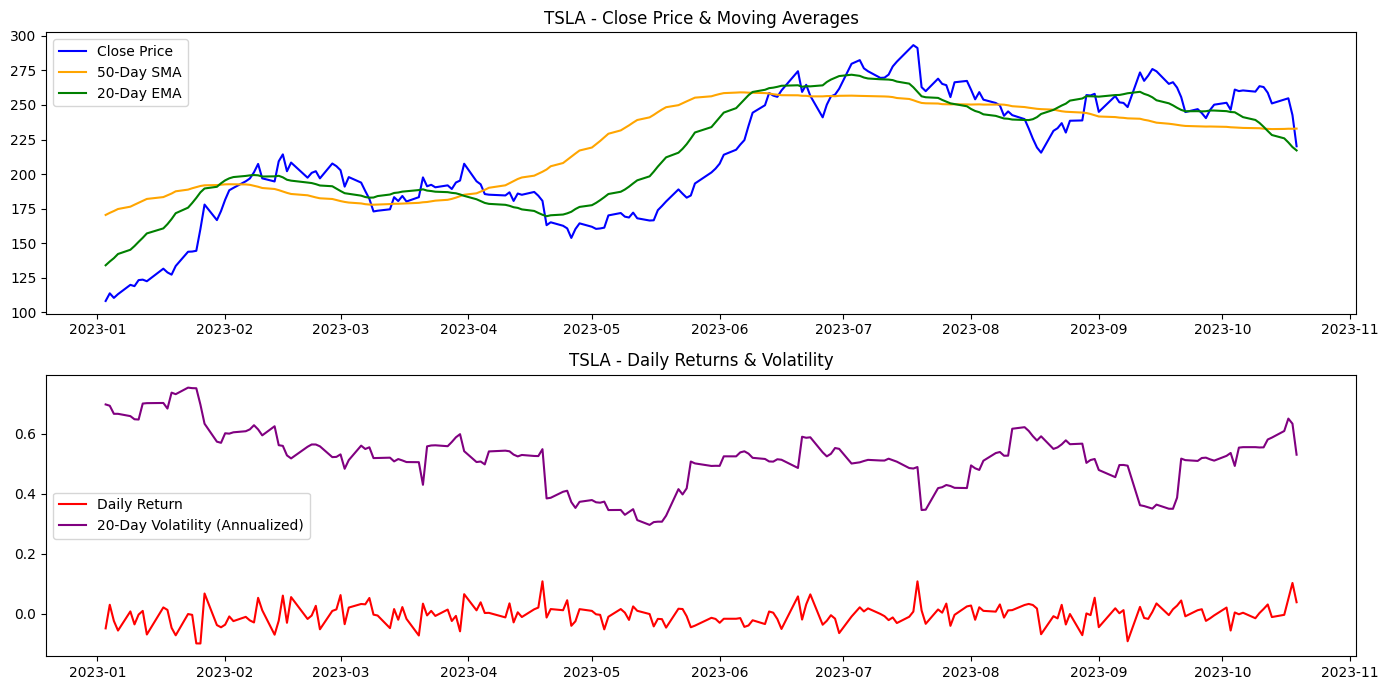

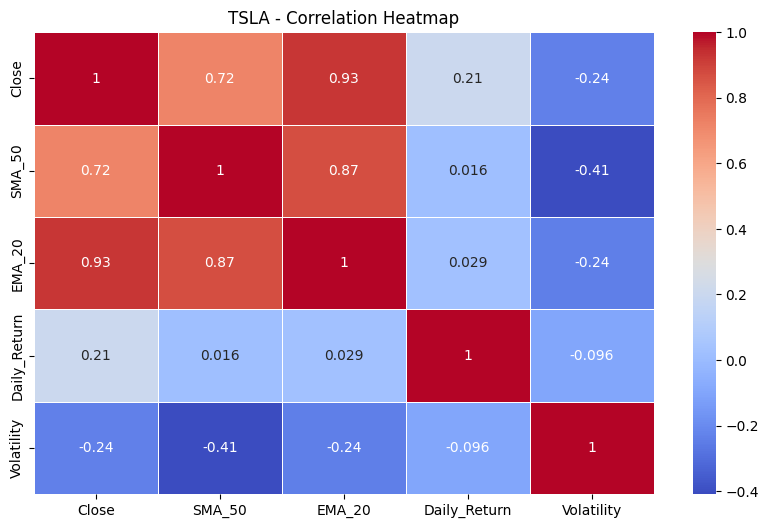

In [8]:
import pynance as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical stock price data using PyNance
ticker = 'TSLA'
data = pn.data.get(ticker, '2023-01-01', '2024-01-01')

# Calculate financial metrics
data['SMA_50'] = data['Close'].rolling(window=50).mean()  
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  
data['Daily_Return'] = data['Close'].pct_change()  
data['Volatility'] = data['Daily_Return'].rolling(window=20).std() * (252**0.5)

# Drop rows with NaN values
data.dropna(inplace=True)

# Plot financial metrics
plt.figure(figsize=(14, 7))

# Subplot 1: Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title(f'{ticker} - Close Price & Moving Averages')
plt.legend()

# Subplot 2: Daily Returns and Volatility
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Daily_Return'], label='Daily Return', color='red')
plt.plot(data.index, data['Volatility'], label='20-Day Volatility (Annualized)', color='purple')
plt.title(f'{ticker} - Daily Returns & Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 6))
corr_matrix = data[['Close', 'SMA_50', 'EMA_20', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'{ticker} - Correlation Heatmap')
plt.show()

# Portfolio Optimization

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from pypfopt import expected_returns, risk_models

# Load and clean your dataset
data = pd.read_csv('AAPL_historical_data.csv', index_col='Date', parse_dates=True)
data = data.dropna()
data = data.loc[:, ~data.columns.duplicated()]

# Standardize data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

# Calculate expected annual returns and sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(scaled_data)
S = risk_models.sample_cov(scaled_data)

# Ensure the covariance matrix is symmetric and positive semi-definite
S = (S + S.T) / 2
S += np.eye(S.shape[0]) * 1e-10

# Define the objective function (negative Sharpe ratio)
def negative_sharpe(weights, mu, S, risk_free_rate=0.02):
    portfolio_return = np.dot(weights, mu)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: Weights are between 0 and 1
bounds = tuple((0, 1) for _ in range(len(mu)))

# Initial guess (equal weights)
init_guess = np.array(len(mu) * [1. / len(mu)])

# Optimize portfolio
result = minimize(negative_sharpe, init_guess, args=(mu, S), method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimized weights
weights = result.x

# Create a DataFrame to display the results
output_df = pd.DataFrame({
    'Ticker': scaled_data.columns,
    'Optimized Weight': weights
})

# Calculate the expected return, volatility, and Sharpe ratio
expected_return = np.dot(weights, mu)
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
sharpe_ratio = (expected_return - 0.02) / expected_volatility

# Create a DataFrame for portfolio metrics
portfolio_metrics_df = pd.DataFrame({
    'Ticker': ['Portfolio'],
    'Optimized Weight': [np.nan],
    'Expected Return': [expected_return],
    'Volatility (Risk)': [expected_volatility],
    'Sharpe Ratio': [sharpe_ratio]
})

# Concatenate the portfolio metrics with the original DataFrame
output_df = pd.concat([output_df, portfolio_metrics_df], ignore_index=True)

# Display the results
print(output_df)

         Ticker  Optimized Weight  Expected Return  Volatility (Risk)  \
0          Open             0.125              NaN                NaN   
1          High             0.125              NaN                NaN   
2           Low             0.125              NaN                NaN   
3         Close             0.125              NaN                NaN   
4     Adj Close             0.125              NaN                NaN   
5        Volume             0.125              NaN                NaN   
6     Dividends             0.125              NaN                NaN   
7  Stock Splits             0.125              NaN                NaN   
8     Portfolio               NaN              NaN           275.8634   

   Sharpe Ratio  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  


In [10]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Option 1: Remove rows with missing values
data = data.dropna()

# Option 2: Fill missing values with a method, like forward fill
data = data.fillna(method='ffill')

# Option 3: Replace missing values with the mean (for each column)
data = data.fillna(data.mean())

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


C:\Users\Hello\AppData\Local\Temp\ipykernel_20384\2353648743.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from pypfopt import expected_returns, risk_models

# Load and clean your dataset
data = pd.read_csv('AAPL_historical_data.csv', index_col='Date', parse_dates=True)
data = data.dropna()
data = data.loc[:, ~data.columns.duplicated()]

# Standardize data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

# Calculate expected annual returns and sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(scaled_data)
S = risk_models.sample_cov(scaled_data)

# Ensure the covariance matrix is symmetric and positive semi-definite
S = (S + S.T) / 2
S += np.eye(S.shape[0]) * 1e-10

# Define the objective function (negative Sharpe ratio)
def negative_sharpe(weights, mu, S, risk_free_rate=0.02):
    portfolio_return = np.dot(weights, mu)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: Weights are between 0 and 1
bounds = tuple((0, 1) for _ in range(len(mu)))

# Initial guess (equal weights)
init_guess = np.array(len(mu) * [1. / len(mu)])

# Optimize portfolio
result = minimize(negative_sharpe, init_guess, args=(mu, S), method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimized weights
weights = result.x

# Display the optimized weights
print("Optimized Weights:")
for ticker, weight in zip(scaled_data.columns, weights):
    print(f"{ticker}: {weight:.2%}")

# Calculate the expected return, volatility, and Sharpe ratio
expected_return = np.dot(weights, mu)
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
sharpe_ratio = (expected_return - 0.02) / expected_volatility

print(f"\nExpected annual return: {expected_return:.2%}")
print(f"Annual volatility (risk): {expected_volatility:.2%}")
print(f"Sharpe ratio: {sharpe_ratio:.2f}")


Optimized Weights:
Open: 12.50%
High: 12.50%
Low: 12.50%
Close: 12.50%
Adj Close: 12.50%
Volume: 12.50%
Dividends: 12.50%
Stock Splits: 12.50%

Expected annual return: nan%
Annual volatility (risk): 27586.34%
Sharpe ratio: nan
